In [1]:
import pandas
import plotly.express as px
import matplotlib.pyplot as plt

import numpy

In [2]:
prices = pandas.read_csv('../../datastore/processed/prices.csv')
prices # load data

,Symbol,base,quote,Kline open time,Open price,High price,Low price,Close price,Volume,Kline Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,ETHBTC,ETH,BTC,2022-11-25 17:00:00,0.072026,0.072222,0.072026,0.072222,1342.1624,2022-11-25 17:29:59.999,96.776126,2657,794.6663,57.298344
1,ETHBTC,ETH,BTC,2022-11-25 17:30:00,0.072222,0.072335,0.072117,0.072162,1185.9640,2022-11-25 17:59:59.999,85.640393,2727,560.9044,40.508977
2,ETHBTC,ETH,BTC,2022-11-25 18:00:00,0.072163,0.072263,0.072101,0.072189,813.4793,2022-11-25 18:29:59.999,58.717779,1862,359.8931,25.975732
3,ETHBTC,ETH,BTC,2022-11-25 18:30:00,0.072188,0.072261,0.072161,0.072212,936.2168,2022-11-25 18:59:59.999,67.599402,1816,470.6928,33.988586
4,ETHBTC,ETH,BTC,2022-11-25 19:00:00,0.072223,0.072479,0.072197,0.072375,1115.5725,2022-11-25 19:29:59.999,80.727099,3088,593.4310,42.945939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201477,BUSDRON,BUSD,RON,2022-12-13 15:00:00,4.629000,4.630000,4.620000,4.621000,5984.0000,2022-12-13 15:29:59.999,27672.337000,108,2086.0000,9651.160000
1201478,BUSDRON,BUSD,RON,2022-12-13 15:30:00,4.620000,4.631000,4.620000,4.630000,3618.0000,2022-12-13 15:59:59.999,16734.982000,42,1642.0000,7593.482000
1201479,BUSDRON,BUSD,RON,2022-12-13 16:00:00,4.631000,4.631000,4.630000,4.631000,3254.0000,2022-12-13 16:29:59.999,15069.018000,33,2998.0000,13883.738000
1201480,BUSDRON,BUSD,RON,2022-12-13 16:30:00,4.630000,4.631000,4.630000,4.631000,14415.0000,2022-12-13 16:59:59.999,66749.027000,92,7577.0000,35089.087000


----
### <center>📜 Question 1: Which coin is available for the most trading </center>

#### Benefits of finding the answer:
- After this we can know the outstanding coins in the crypto community
- As well as knowing the coins is not of interest to many people
#### Answer:
- We take all the distinct Symbols in trading data, then count the number of time it appear even on base or quote

In [3]:
# group all same symbols in to one
g_symbol_data = prices.groupby(["Symbol","base","quote"]).count()[["Kline open time"]]
g_symbol_data.reset_index(inplace=True)

# count appear time
quote_symbol_data = g_symbol_data.groupby("quote").count()[["Kline open time"]]
base_symbol_data = g_symbol_data.groupby("base").count()[["Kline open time"]]

In [4]:
#combie them and get the total time appear in quote and base
merge_data = base_symbol_data.merge(quote_symbol_data, left_index=True, right_index=True, how='outer').fillna(0).astype(int)
merge_data["Total"] = merge_data["Kline open time_x"] + merge_data["Kline open time_y"]
merge_data = merge_data.sort_values(by="Total", ascending=False).head(20)
merge_data

,Kline open time_x,Kline open time_y,Total
USDT,8,330,338
BUSD,11,321,332
BTC,13,282,295
BNB,13,115,128
ETH,14,100,114
TRY,0,77,77
EUR,2,46,48
BRL,0,31,31
AUD,2,18,20
GBP,2,17,19


In [5]:
fig = px.bar(merge_data, x=merge_data.index, y='Total')
fig.show()

> The result is not too surprising as the top stablecoins are UDST, BUSD, and BNB which are used for the majority of possible transactions. Next are the dominant coins in the coin world, BTC as well as ETH, which also account for a significant amount.
----

### <center>📜 Question 2: Is the quotation correct according to the value of the tokens ? </center>

#### Benefits of finding the answer:
- After this we can know should we should trading many time in this market
- Beside that, we can verify that the price of the token for user is clearly 

#### Answer:

- We don't got the token price in the dataset, but we know that there are some `stable token` that have price nearly 1$ so:

    - Make a new `only_stable` that only contain price from `token` to `stable token`
    - Then we assume that the `stable token` price is allway 1$, small differences will be accepted
- Then with all symbol, we calculate the ratio of the given price with the price we get from `only_stable`

In [6]:
# get the data the have stabel_coin in quote or base
stable_coin  = ['USDT','BUSD']
only_stable = prices[prices.base.isin(stable_coin) | prices.quote.isin(stable_coin)][['base','quote','Kline open time','Open price','High price','Low price','Close price']].set_index('Kline open time')

In [7]:
# reverse quote and base if the quote is not in stable_coin
temp = only_stable[~only_stable.quote.isin(stable_coin)]
only_stable[~only_stable.quote.isin(stable_coin)] = pandas.concat(
    [temp[['quote','base']],1/temp[['Open price','High price','Low price','Close price']]], # calculate the new prices
    axis=1
)

In [8]:
only_stable

,base,quote,Open price,High price,Low price,Close price
Kline open time,,,,,,
2022-11-25 17:00:00,BTC,USDT,16485.140000,16512.430000,16474.290000,16483.270000
2022-11-25 17:30:00,BTC,USDT,16483.270000,16536.350000,16482.980000,16510.380000
2022-11-25 18:00:00,BTC,USDT,16509.520000,16528.600000,16502.770000,16509.400000
2022-11-25 18:30:00,BTC,USDT,16508.950000,16518.590000,16477.130000,16495.430000
2022-11-25 19:00:00,BTC,USDT,16495.430000,16553.880000,16494.010000,16515.200000
...,...,...,...,...,...,...
2022-12-13 15:00:00,RON,BUSD,0.216029,0.215983,0.216450,0.216403
2022-12-13 15:30:00,RON,BUSD,0.216450,0.215936,0.216450,0.215983
2022-12-13 16:00:00,RON,BUSD,0.215936,0.215936,0.215983,0.215936


> now we got the table exchange price to `stable coin`

In [6]:
#get the unique symbols has in data and transform price to a new shape that symbols and Kline open time is the index (multindex)
symbols_unique = numpy.unique(prices[['Symbol','base','quote']].to_numpy(dtype='str'),axis=0)
price_table = prices.set_index(['Symbol','Kline open time'])

In [10]:
#try to calcuate the ratio between given and we got
n = len(symbols_unique)
print('total: ',n)
diff = []
for i in symbols_unique:
    if n%100 == 0:
        print(n)
    # calculate by stable_coin
    cal = only_stable[only_stable.base == i[1]][['Open price','High price','Low price','Close price']]/only_stable[only_stable.base == i[2]][['Open price','High price','Low price','Close price']]
    #ratio
    gap = price_table.loc[i[0]][['Open price','High price','Low price','Close price']]/cal
    diff += [ numpy.mean(gap,axis=0)]
    n-=1
diff = pandas.DataFrame(diff)

total:  1394
1300
1200
1100
1000
900
800
700
600
500
400
300
200
100


In [11]:
pandas.DataFrame(diff).describe()

,Open price,High price,Low price,Close price
count,1050.000000,1050.000000,1050.000000,1050.000000
mean,1.000101,1.000535,0.999856,1.000058
std,0.000470,0.001530,0.001229,0.000564
min,0.994130,0.992628,0.991015,0.992246
25%,0.999978,0.999872,0.999265,0.999938
50%,1.000043,1.000208,1.000012,1.000004
75%,1.000143,1.001135,1.000261,1.000089
max,1.005238,1.017435,1.006667,1.007816


> Based on the above table, we see that the distribution is mainly at 1., and the distribution deviation is not high, so it can be considered that the conversion value of the tokens follows their actual value.


### <center>📜 Question 3: Average time for each up/down cycle </center>

#### Benefits of finding the answer:
- After this we can know the possibility that the trend of the token is changed in this market
- It also help us be careful when exchange based on the current trend
#### Answer:
- We only use the `high price` and `low price` because the other price is only in the a fixed time point
- Compare prices with the pervious time, if the gap `is 0` it still keep the trend, `lower than 0` is in down cycle, `higher than 0` is in up cycle
- After all, we look how is it distributed

In [4]:
#reshape the prices table to a suitable form
symbols_price = prices.set_index(['Symbol','Kline open time'])[['High price','Low price']]

In [39]:
period = []
n = len(symbols_unique)
print('total: ',n)

#get the compare price for every single opentime with the previous one, then calculate how long it continue the trend
# = 0 : the trend is continue
# > 0 : the trend is up
# < 0 : the trend is down
for i in symbols_unique[:,0]:
    if n%100 == 0:
        print(n)
    n-=1
    try:
        temp = (symbols_price.loc[i].iloc[1:].reset_index().iloc[:,1:] - symbols_price.loc[i].iloc[:-1].reset_index().iloc[:,1:])
        a = [0] 
        b = [0]
        c = [0]
        d = [0]
        for i in  (temp['High price'] >=0):
            if i:
                a[-1] +=1
            else:
                a.append(1)
        for i in  (temp['High price'] <=0):
            if i:
                b[-1] +=1
            else:
                b.append(1)

        for i in  (temp['Low price'] >=0):
            if i:
                c[-1] +=1
            else:
                c.append(1)
        for i in  (temp['Low price'] <=0):
            if i:
                d[-1] +=1
            else:
                d.append(1)
        period.append([numpy.mean(a),numpy.mean(b),numpy.mean(c),numpy.mean(d)])
    except:
        continue

period = pandas.DataFrame(period,columns=['High up','High down','Low up','Low down'])

total:  1394
1300
1200
1100
1000
900
800
700
600
500
400
300
200
100


In [37]:
period.describe()

,High up,High down,Low up,Low down
count,1394.000000,1394.000000,1394.000000,1394.000000
mean,2.528845,2.910814,2.843111,2.574416
std,1.996261,2.231795,1.793782,1.946345
min,1.500000,1.963636,1.833333,1.766871
25%,2.004640,2.316354,2.291777,2.018692
50%,2.154613,2.511628,2.475645,2.221080
75%,2.571429,2.928814,2.928814,2.618182
max,45.473684,45.473684,43.200000,43.200000


<AxesSubplot:ylabel='Density'>

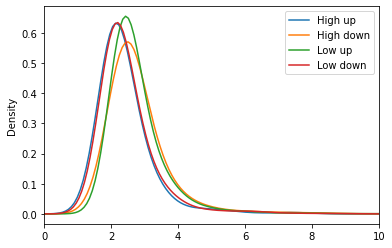

In [38]:
period.plot.kde(xlim = [0,10])

> The average time for each rise or fall is around 2-3 cycles, however this indicator will not be robust in all cases when the standard deviation is too high